# FE Homework 7
**FBA Quant 이의형**

---

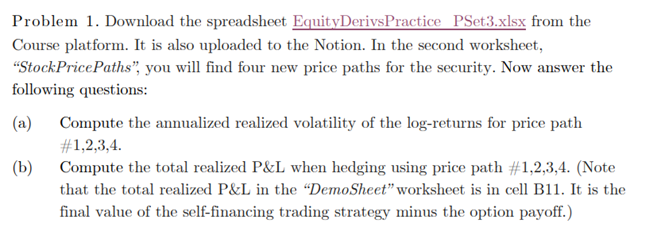

**(a)**

In [1]:
import pandas as pd
import numpy as np

data_path = 'data/'
df = pd.read_excel(data_path + 'EquityDerivsPractice_PSet3.xlsx', sheet_name = 1, index_col = 0)

init_price = df.shift(1, axis=0)
log_rtn = np.log(df) - np.log(init_price)

trading_day = 200
annual_rtn = log_rtn.mean(axis=0) * trading_day
annual_vol = log_rtn.std(axis=0) * np.sqrt(trading_day)

result = pd.DataFrame(index = ['Avg_Return_(Annualized)', 'Std_Return_(Annualized)'], columns = df.columns)
result.loc['Avg_Return_(Annualized)',:] = annual_rtn
result.loc['Std_Return_(Annualized)',:] = annual_vol
result

,Stock Path # 1,Stock Path # 2,Stock Path # 3,Stock Path # 4
Avg_Return_(Annualized),-0.145909,0.348794,0.989746,-0.60338
Std_Return_(Annualized),0.254211,0.303594,0.515689,0.401396


**(b)**

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def black_scholes_equation(S, K, T, r, sigma, type_):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if type_ == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif type_ == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return option_price

In [3]:
data_path = 'data/'
ex_df = pd.read_excel(data_path + 'EquityDerivsPractice_PSet3.xlsx', sheet_name = 0)
ex_df = ex_df['Stock Price']

init_price = ex_df.shift(1)
log_rtn = np.log(ex_df) - np.log(init_price)

print('-'*50)
display(log_rtn.head(5))

trading_day = 200
annual_rtn = log_rtn.mean() * trading_day
annual_vol = log_rtn.std() * np.sqrt(trading_day)

print('-'*50)
print(f'Avg Return (Annualized): {annual_rtn}')
print(f'Std Return (Annualized): {annual_vol}')

print('-'*50)

S = 50
K = 50
T = 0.25
r = 0.02

sigma_i = 0.3
sigma_r = 0.249

options = 100000

print('-implied-')

call_option_price_i = black_scholes_equation(S, K, T, r, sigma_i, 'call')
total_bs_option_price_i = call_option_price_i * options
print(f'S.F. Portfolio Value: {total_bs_option_price_i}')

d1_i = (np.log(S / K) + (r + 0.5 * sigma_i**2) * T) / (sigma_i * np.sqrt(T))
print(f'd1: {d1_i}')

stocks_held_i = norm.cdf(d1_i) * options
print(f'Stocks Held: {stocks_held_i}')

cash_i = total_bs_option_price_i - stocks_held_i * S
print(f'Cash Account: {cash_i}')

print('-'*50)

print('-realized-')

call_option_price_r = black_scholes_equation(S, K, T, r, sigma_r, 'call')
total_bs_option_price_r = call_option_price_r * options
print(f'S.F. Portfolio Value: {total_bs_option_price_r}')

d1_r = (np.log(S / K) + (r + 0.5 * sigma_r**2) * T) / (sigma_r * np.sqrt(T))
print(f'd1: {d1_r}')

stocks_held_r = norm.cdf(d1_r) * options
print(f'Stocks Held: {stocks_held_r}')

cash_r = total_bs_option_price_r - stocks_held_r * S
print(f'Cash Account: {cash_r}')

--------------------------------------------------


0         NaN
1   -0.009904
2   -0.030796
3   -0.005020
4    0.003776
Name: Stock Price, dtype: float64

--------------------------------------------------
Avg Return (Annualized): 0.3379434271105044
Std Return (Annualized): 0.2490138823192467
--------------------------------------------------
-implied-
S.F. Portfolio Value: 310815.1216206444
d1: 0.10833333333333334
Stocks Held: 54313.43589859989
Cash Account: -2404856.6733093504
--------------------------------------------------
-realized-
S.F. Portfolio Value: 260230.52906473866
d1: 0.10241064257028114
Stocks Held: 54078.46317305103
Cash Account: -2443692.629587813


---

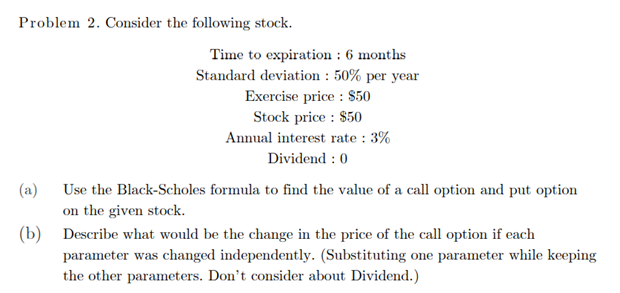

**(a)**

In [4]:
import numpy as np
from scipy.stats import norm

def black_scholes_equation(S, K, T, r, sigma, type_):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if type_ == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif type_ == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return option_price

S = 50
K = 50
T = 6/12
sigma = 0.5
r = 0.03

print(f"call option: {black_scholes_equation(S, K, T, r, sigma, 'call'):.2f}")
print(f"put option: {black_scholes_equation(S, K, T, r, sigma, 'put'):.2f}")

call option: 7.34
put option: 6.60


**(b)**

<div>
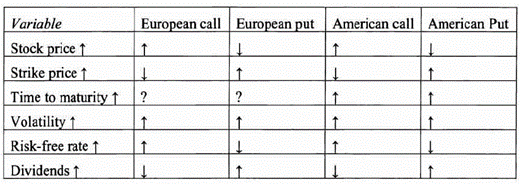
</div>

---

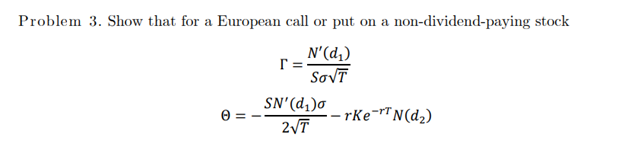

**(a)**

$\displaystyle \Gamma = \frac {\partial^2 f(S,t)} {\partial S^2}$이고,　$\displaystyle \Delta = \frac {\partial f(S,t)} {\partial S}$이므로 $\displaystyle \Gamma = \frac {\partial \Delta} {\partial S}$이다.  

콜옵션의 델타 $\displaystyle \Delta = N(d_1)$이므로 $\displaystyle \Gamma = \frac {\partial N(d_1)} {\partial S}$이다.  

$\displaystyle (d_1)' = \frac {1} {S \sigma \sqrt{T}}$이므로  

$\displaystyle \Gamma = \frac {N'(d_1)} {S \sigma \sqrt{T}}$


**(b)**

가격이 $P(S)$인 파생증권에 대해 $\Delta, \Gamma, \Theta$는 다음 관계가 성립한다.  

$\displaystyle \Theta + rS\Delta + \frac {1} {2} \sigma^2 S^2 \Gamma = rP$  

따라서 $\displaystyle \Theta  = - \frac {1} {2} \sigma^2 S^2 \Gamma -rS\Delta + rP =  - \frac {1} {2} \sigma^2 S^2 \Gamma -r(S\Delta - P)$이다.  

$\displaystyle \Gamma = \frac {N'(d_1)} {S \sigma \sqrt{T}}$, $\displaystyle \Delta = N(d_1)$이고, 콜옵션의 $\displaystyle P = SN(d_1) - Ke^{-rT}N(d_2)$이므로  

$\displaystyle \Theta = - \frac {1} {2} \sigma^2 S^2  \frac {N'(d_1)} {S \sigma \sqrt{T}} - r(SN(d_1) - SN(d_1) + Ke^{-rT}N(d_2))$ 

$\displaystyle = - \frac {S N'(d_1) \sigma} {2\sqrt{T}} - rKe^{-rT}N(d_2)$ 

---

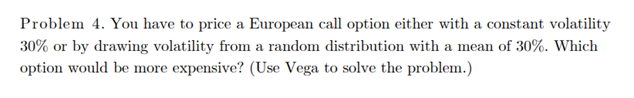

콜옵션 가격이 변동성에 대해 convex하면, $\displaystyle c(E[\sigma]) \le E[c(\sigma)]$가 성립한다.  

따라서 어느 쪽이 더 비싼지는 오목성과 볼록성을 판단하는 2차 편미분 함수인 Volga로 측정된다.

콜옵션 가격을 변동성으로 2차 편미분하면 $\displaystyle Volga = v \frac {d_1d_2} {\sigma}$이다.  

여기서 $v$는 항상 양수이고, $d_1, d_2$에 의해 오목성이 결정되는데,  

대부분 $d_1, d_2$는 OTM에서 모두 음수, ITM에서 모두 양수이기 때문에 Volga 또한 양수로 convex를 만족한다.

하지만, ATM에 가까워질수록 $d_1 > 0, d_2 < 0$가 되는데, 이때 Volga는 음수로 constant volatility를 가진 콜옵션이 더 비싸지게 된다.  

---

## Problem 5.

Solve the corresponding leetcode problem below and register the solution on GitHub.

**3Sum**  

Given an integer array nums, return all the triplets **[nums[i], nums[j], nums[k]]** such that **i != j, i != k,** and **j != k,** and **nums[i] + nums[j] + nums[k] == 0.**

Notice that the solution set must not contain duplicate triplets.

In [81]:
nums = [-1,0,1,2,-1,-4]
nums

[-1, 0, 1, 2, -1, -4]

In [82]:
from itertools import combinations

class Solution1:
    def threeSum(self, nums: list[int]) -> list[list[int]]:
        comb = list(combinations(nums, 3))
        comb_sum = list(map(sum, comb))

        comb_sum_zero = set()

        for i in range(len(comb_sum)):
            if comb_sum[i] == 0:
                sort_ = tuple(sorted(comb[i]))
                comb_sum_zero.add(sort_)
        
        return list(map(list, comb_sum_zero))

In [85]:
# 시간 초과
Solution1().threeSum(nums)

[[-1, 0, 1], [-1, -1, 2]]

---

## Problem 6.

Solve the corresponding leetcode problem below and register the solution on GitHub.

**Happy Number**

Write an algorithm to determine if a number n is happy.

A happy number is a number defined by the following process:

- Starting with any positive integer, replace the number by the sum of the squares of its digits.
- Repeat the process until the number equals 1 (where it will stay), or it loops endlessly in a cycle which does not include 1.
- Those numbers for which this process ends in 1 are happy.

Return true if n is a happy number, and false if not.

In [93]:
n1 = 19
n2 = 2
n1, n2

(19, 2)

In [94]:
class Solution2:
    def isHappy(self, n: int) -> bool:
        dup = []
        while n != 1:
            n = str(n)
            n_sum = 0
            for i in n:
                n_sum += int(i)**2
            n = n_sum
            if n_sum in dup:
                return False
            dup.append(n)
        return True

In [95]:
Solution2().isHappy(n1), Solution2().isHappy(n2)

(True, False)

---